In [26]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import itertools
import time
import sys

def create_city_chart(cities, road, method_name):
    x_coords, y_coords = zip(*cities)

    plt.scatter(x_coords, y_coords, color='blue')

    for i, (x, y) in enumerate(cities):
        plt.annotate(f'{i}', (x, y), textcoords="offset points", xytext=(5, 5), ha='center', color='red')

    for i in range(len(cities)):
        point_source = tuple(map(int, cities[road[i]]))
        point_dest = tuple(map(int, cities[road[i+1]]))
        plt.plot([point_source[0], point_dest[0]], [point_source[1], point_dest[1]], marker='o', color='green')

    plt.xlabel('x-axis')
    plt.ylabel('y-axis')
    plt.title(f'{method_name} method')

    plt.xlim(0, 100)
    plt.ylim(0, 100)

    plt.grid()
    plt.show()


def generate_cities(num_of_cities):
    cities = np.zeros(num_of_cities, dtype='i,i')

    for i in range(len(cities)):
        cities[i][0] = random.randint(0, 100)
        cities[i][1] = random.randint(0, 100)

    return cities

def calculate_distance(p1, p2):
    return math.dist(p1, p2)

def nearest_neighbor_algorithm(cities):
    start = time.perf_counter()
    cities_helper = np.zeros(len(cities), dtype=int)
    road = []

    total_flops = 0
    total_distance = 0
    current_city_index = 0
    cities_helper[current_city_index] = 1
    road.append(current_city_index)

    for i in range(len(cities) - 1):
        nearest_city_index, min_distance, flops = find_nearest_neighbor(current_city_index, cities, cities_helper)
        total_distance += min_distance
        total_flops += flops
        road.append(nearest_city_index)

        cities_helper[nearest_city_index] = 1
        current_city_index = nearest_city_index

    total_distance += calculate_distance(cities[current_city_index], cities[0])
    total_flops += 5
    road.append(0)

    end = time.perf_counter()
    execution_time = end - start
    mflops = (total_flops / (execution_time * 10e6))
    return total_distance, execution_time, mflops, road


def find_nearest_neighbor(current_city_index, cities, cities_helper):
    flops = 0
    min_distance = 101
    nearest_city_index = -1

    for i in range(len(cities)):
        current_distance = calculate_distance(cities[current_city_index], cities[i])
        flops += 5
        if i != current_city_index and cities_helper[i] == 0 and min_distance > current_distance:
            min_distance = current_distance
            nearest_city_index = i

    return nearest_city_index, min_distance, flops


def convert_city_permutation_to_road(city_permutation, cities):
    road = []

    for point in city_permutation:
        for i, city in enumerate(cities):
            if tuple(city) == tuple(point):
                road.append(i)
                break

    road.append(0)
    return road

def brute_force_algorithm(cities):
    start = time.perf_counter()

    flops = 0
    road = []
    min_distance = sys.maxsize

    cities_list = [tuple(map(int, city)) for city in cities]
    cities_permutations = list(itertools.permutations(cities_list))

    distance_list = []
    for city_permutation in cities_permutations:
        total_distance = 0
        for i in range(len(city_permutation) - 1):
            total_distance += calculate_distance(city_permutation[i], city_permutation[i + 1])
            flops += 5

        total_distance += calculate_distance(city_permutation[0], city_permutation[len(city_permutation) - 1])
        if total_distance < min_distance:
            road = convert_city_permutation_to_road(city_permutation, cities)
            min_distance = total_distance

        distance_list.append(total_distance)
        flops += 5

    distance_list.sort()

    end = time.perf_counter()
    execution_time = end - start
    mflops = (flops / (execution_time * 1e6))

    return distance_list[0], execution_time, mflops, road


def test_brute_force_algorithm(m):
    costs = []

    for num_of_cities in range(1, m + 1):
        cities = generate_cities(num_of_cities)

        cost, execution_time, mflops, road = brute_force_algorithm(cities)

        costs.append((num_of_cities, round(cost, 2), execution_time, mflops))

    create_result_table(costs, 'Brute Force Method')


def test_nearest_neighbor_algorithm(m):
    costs = []

    for num_of_cities in range(1, m + 1):
        cities = generate_cities(num_of_cities)

        cost, execution_time, mflops, road = nearest_neighbor_algorithm(cities)

        costs.append((num_of_cities, round(cost, 2), execution_time, mflops))

    create_result_table(costs, 'Nearest Neighbor Method')


def create_result_table(costs, title):
    column_labels = ['Num of cities', 'Cost', 'Time (s)', 'MFLOPS']

    fig, ax = plt.subplots(figsize=(10, 6))

    ax.axis('off')
    ax.set_title(title)
    table = ax.table(cellText=costs, colLabels=column_labels, cellLoc='center', loc='center')

    table.scale(1.2, 1.2)

    plt.show()

In [56]:
num_of_cities_input = input('Enter number of cities:')

Enter number of cities: 9


In [58]:
cities_input = generate_cities(int(num_of_cities_input))

N-N Method total cost: 328.2711989502293 for 9 cities


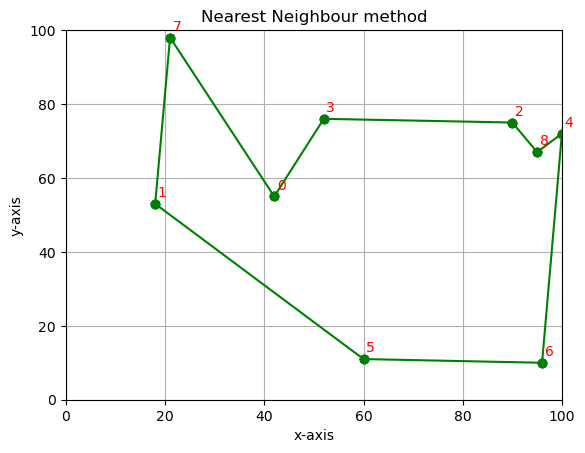

In [60]:
nn_result = nearest_neighbor_algorithm(cities_input)
print(f'N-N Method total cost: {nn_result[0]} for {num_of_cities_input} cities')
create_city_chart(cities_input, nn_result[3], 'Nearest Neighbour')

Brute Force Method total cost: 303.2828786101861 for 9 cities


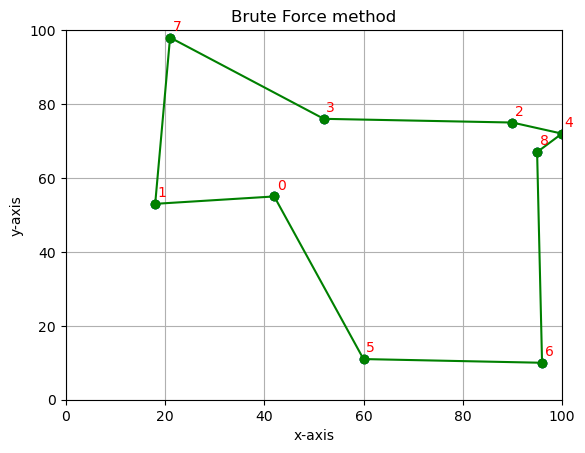

In [62]:
bf_result = brute_force_algorithm(cities_input)
print(f'Brute Force Method total cost: {bf_result[0]} for {num_of_cities_input} cities')
create_city_chart(cities_input, bf_result[3], 'Brute Force')

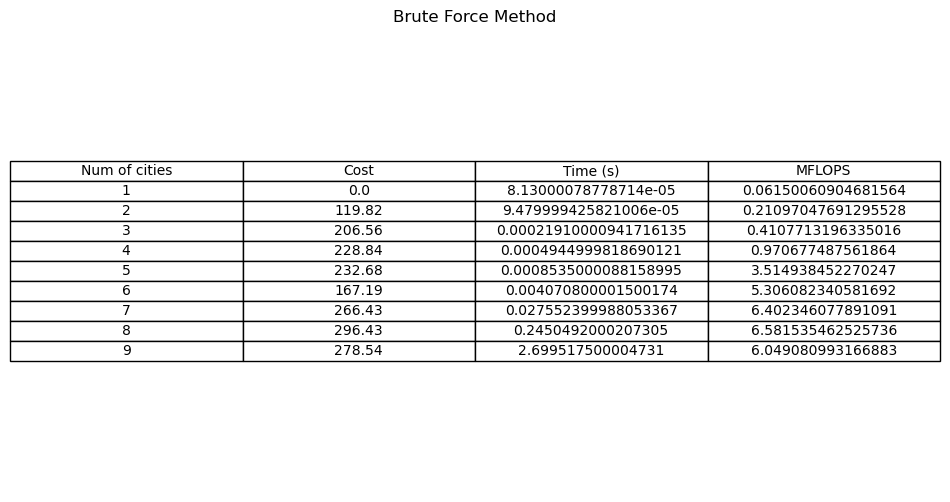

In [64]:
m = 9
test_brute_force_algorithm(m)

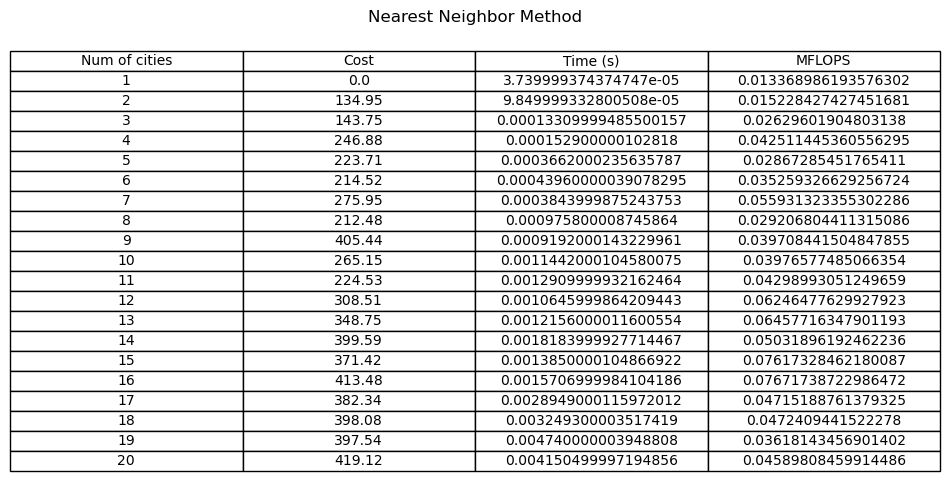

In [66]:
m = 20
test_nearest_neighbor_algorithm(m)

<h1><center>Wnioski</center></h1>

Na podstawie wyników porównujących metody Brute Force i Nearest Neighbor (NN) można zauważyć kilka istotnych różnic w ich działaniu. Przede wszystkim, metoda NN znacząco przewyższa metodę Brute Force pod względem szybkości działania i złożoności obliczeniowej. Złożoność Brute Force to O(n!), co oznacza, że czas obliczeń gwałtownie rośnie wraz z liczbą miast. Z kolei metoda NN ma złożoność O(n²), co sprawia, że jest znacznie bardziej wydajna w praktyce.

Warto podkreślić, że metoda Brute Force, choć bardzo kosztowna obliczeniowo, jest niezawodna w dostarczeniu najlepszego możliwego rozwiązania. Natomiast metoda NN, będąca bardziej praktyczna, pozwala na szybsze znalezienie rozwiązania, co jest szczególnie przydatne przy większej liczbie miast, ale nie zawsze będzie ono optymalne.